In [10]:
from torchvision import transforms
preprocessor = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [11]:
from torchvision import datasets
from torch.utils.data import random_split
train_set = datasets.CIFAR10(root="./CIFAR10/", train=True, transform=preprocessor, download=True)
test_val_set = datasets.CIFAR10(root="./CIFAR10/", train=False, transform=preprocessor, download=True)
test_set, val_set = random_split(test_val_set, [5000, 5000])

Files already downloaded and verified
Files already downloaded and verified


In [12]:
from torch.utils.data import DataLoader

train_load = DataLoader(dataset=train_set, shuffle=True, batch_size=8, num_workers=2, drop_last=True)
val_load = DataLoader(dataset=val_set, shuffle=True, batch_size=8, num_workers=2, drop_last=True)
test_load = DataLoader(dataset=test_set, shuffle=True, batch_size=8, num_workers=2, drop_last=True)


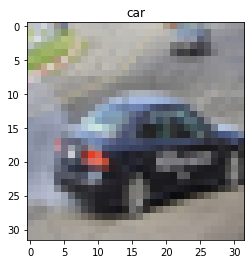

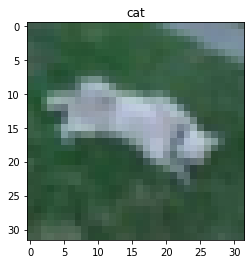

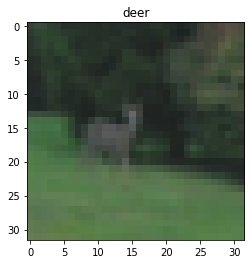

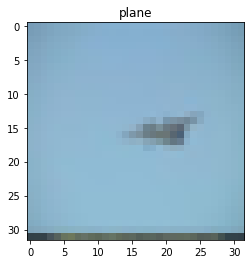

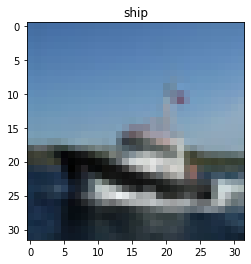

In [13]:
import matplotlib.pyplot as plt
import numpy as np


class_labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
xb, yb = next(iter(train_load))
    
for i in range(5):
    plt.title(class_labels[yb[i]])
    plt.imshow(np.transpose((xb[i]/2 + 0.5).numpy(), (1, 2, 0)))
    plt.pause(0.01)


In [19]:
import torch
from torch import nn

model = nn.Sequential(
    nn.Conv2d(3, 6, 5, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6, 16, 5, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),

    nn.Linear(400, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10)
)

In [20]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()
# Old
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# New, with l2 regularization. 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)

loss_func = torch.nn.CrossEntropyLoss()

In [21]:
epoques = 20 #TODO set epoques to 10

train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []
for i in range(epoques):
    
    model.train()
    train_accuracy_accumulator = 0
    train_loss_accumulator = 0
    for x_batch, y_batch in train_load:
        out = model(x_batch)
        loss = loss_func(out, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_accuracy_accumulator += accuracy(out, y_batch)
        train_loss_accumulator += loss
    train_accuracies.append((train_accuracy_accumulator / len(train_load))*100)
    train_losses.append(train_loss_accumulator / len(train_load))

    model.eval()
    with torch.no_grad():

        val_accuracy_accumulator = 0
        val_loss_accumulator = 0
        for x_batch, y_batch in val_load:
            out = model(x_batch)
            loss = loss_func(out, y_batch)
            val_accuracy_accumulator += accuracy(out, y_batch)
            val_loss_accumulator += loss
        val_accuracies.append((val_accuracy_accumulator / len(val_load))*100)
        val_losses.append(val_loss_accumulator / len(val_load))

print(train_accuracies)
print(val_accuracies)
print(train_losses)
print(val_losses)


[tensor(10.0040), tensor(10.1080), tensor(9.9680), tensor(10.2140), tensor(10.0260), tensor(18.6800), tensor(21.2940), tensor(22.0600), tensor(21.3260), tensor(21.4320), tensor(20.1800), tensor(21.3440), tensor(21.4200), tensor(21.9240), tensor(21.7540), tensor(21.7500), tensor(22.3580), tensor(22.2060), tensor(23.2180), tensor(23.1380)]
[tensor(10.3600), tensor(9.9800), tensor(9.8800), tensor(9.8400), tensor(15.3600), tensor(22.6600), tensor(22.9800), tensor(21.7200), tensor(22.2600), tensor(18.1400), tensor(19.6600), tensor(22.5200), tensor(20.7600), tensor(23.5200), tensor(21.7400), tensor(21.6400), tensor(22.0600), tensor(21.1800), tensor(21.9800), tensor(23.8200)]
[tensor(2.3066, grad_fn=<DivBackward0>), tensor(2.3056, grad_fn=<DivBackward0>), tensor(2.3070, grad_fn=<DivBackward0>), tensor(2.3065, grad_fn=<DivBackward0>), tensor(2.3058, grad_fn=<DivBackward0>), tensor(2.1427, grad_fn=<DivBackward0>), tensor(2.0862, grad_fn=<DivBackward0>), tensor(2.0860, grad_fn=<DivBackward0>), t

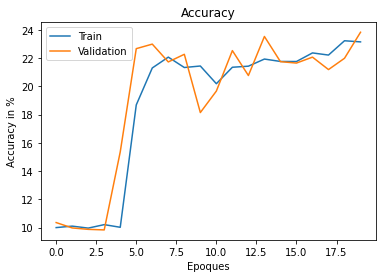

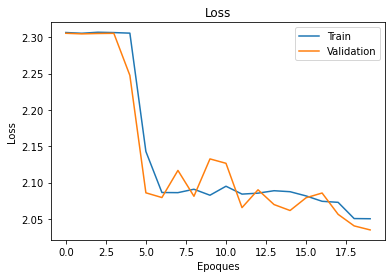

In [22]:
import matplotlib.pyplot as plt

plt.title("Accuracy")
plt.plot(range(epoques), train_accuracies, label="Train")
plt.plot(range(epoques), val_accuracies, label="Validation")
plt.legend()
plt.xlabel("Epoques")
plt.ylabel("Accuracy in %")

plt.show()

plt.title("Loss")
plt.plot(range(epoques), train_losses, label="Train")
plt.plot(range(epoques), val_losses, label="Validation")
plt.legend()
plt.xlabel("Epoques")
plt.ylabel("Loss")

plt.show()
